In [139]:
import pandas as pd
import yfinance as yf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, accuracy_score

In [140]:
dataset_finance = yf.Ticker("^GSPC")

dataframe_pd = dataset_finance.history(period="10y")
dataframe_pd

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-06-25 00:00:00-04:00,1949.270020,1960.829956,1947.489990,1959.530029,3106710000,0.0,0.0
2014-06-26 00:00:00-04:00,1959.890015,1959.890015,1944.689941,1957.219971,2778840000,0.0,0.0
2014-06-27 00:00:00-04:00,1956.560059,1961.469971,1952.180054,1960.959961,4290590000,0.0,0.0
2014-06-30 00:00:00-04:00,1960.790039,1964.239990,1958.219971,1960.229980,3037350000,0.0,0.0
2014-07-01 00:00:00-04:00,1962.290039,1978.579956,1962.290039,1973.319946,3188240000,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-17 00:00:00-04:00,5431.109863,5488.500000,5420.399902,5473.229980,3447840000,0.0,0.0
2024-06-18 00:00:00-04:00,5476.149902,5490.379883,5471.319824,5487.029785,3544330000,0.0,0.0
2024-06-20 00:00:00-04:00,5499.990234,5505.529785,5455.560059,5473.169922,3847060000,0.0,0.0


<Axes: xlabel='Date'>

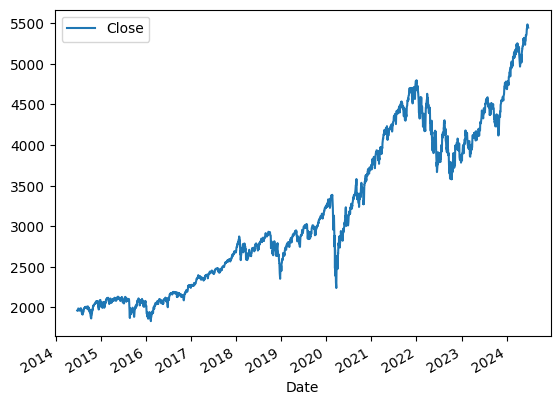

In [141]:
dataframe_pd.plot.line(y="Close", use_index=True)

In [142]:
del dataframe_pd["Dividends"]
del dataframe_pd["Stock Splits"]

dataframe_pd["Tomorrow"] = dataframe_pd["Close"].shift(-1)

dataframe_pd["Goal"] = (dataframe_pd["Tomorrow"] > dataframe_pd["Close"]).astype(int)
dataframe_pd

,Open,High,Low,Close,Volume,Tomorrow,Goal
Date,,,,,,,
2014-06-25 00:00:00-04:00,1949.270020,1960.829956,1947.489990,1959.530029,3106710000,1957.219971,0
2014-06-26 00:00:00-04:00,1959.890015,1959.890015,1944.689941,1957.219971,2778840000,1960.959961,1
2014-06-27 00:00:00-04:00,1956.560059,1961.469971,1952.180054,1960.959961,4290590000,1960.229980,0
2014-06-30 00:00:00-04:00,1960.790039,1964.239990,1958.219971,1960.229980,3037350000,1973.319946,1
2014-07-01 00:00:00-04:00,1962.290039,1978.579956,1962.290039,1973.319946,3188240000,1974.619995,1
...,...,...,...,...,...,...,...
2024-06-17 00:00:00-04:00,5431.109863,5488.500000,5420.399902,5473.229980,3447840000,5487.029785,1
2024-06-18 00:00:00-04:00,5476.149902,5490.379883,5471.319824,5487.029785,3544330000,5473.169922,0
2024-06-20 00:00:00-04:00,5499.990234,5505.529785,5455.560059,5473.169922,3847060000,5464.620117,0


In [143]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = dataframe_pd.iloc[:-100]
test = dataframe_pd.iloc[-100:]

predictors = ["Open", "High", "Low", "Close", "Volume"]
model.fit(train[predictors], train["Goal"])

predictions = model.predict(test[predictors])
predictions = pd.Series(predictions, index=test.index)  


In [144]:
accuracy_score(test["Goal"], predictions)

0.45